# PySOQCS Example 1: Elementary example program.

Elementary example of SOQCS for a simple circuit with only one beamsplitter.

Structure:

    - Create a circuit.
    - Build the circuit.
    - Create a simulator to run it.
    - Run the simulation.
    - Print the output probabilities.

# Import  and configure library

In [1]:
import pysoqcs as soqcs

# Managing photons

Create and build a circuit, including the photons to be sent to that circuit.

In [2]:
# Create circuit
example = soqcs.qodev(2,2);

# Build circuit
example.empty_channel(0)
example.add_photons(2,1)
example.separator()
example.beamsplitter(0,1,45.0,0.0)
example.separator()
example.detector(0)
example.detector(1)

Plot circuit

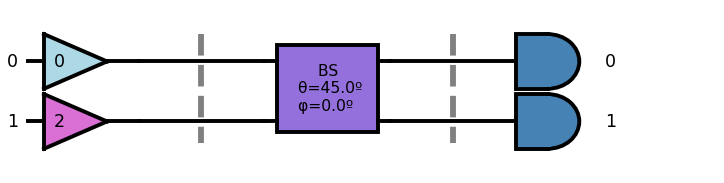

In [3]:
example.show(depth=7,sizexy=70)

Create a simulator and run the simulation.

In [4]:
simulator=soqcs.simulator()
outcome=simulator.run(example)

Print outcome. 

<b>Known issue</b>: Sometimes it does not print one of the lines that later on it is appended at the next output.

In [5]:
outcome.prnt_bins()

 0 :  | 2, 0 >: 0.25
 1 :  | 1, 1 >: 0.5
 2 :  | 0, 2 >: 0.25


Plot outcome

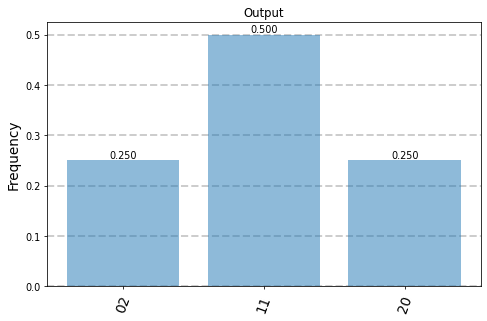

In [6]:
outcome.show(dpi=70)

# Managing states

Create a circuit.

In [7]:
# Create a circuit
example = soqcs.qocircuit(2);
# Build circuit
example.beamsplitter(0,1,45.0,0.0)
example.detector(0)
example.detector(1)

Create and initialize the input state

In [8]:
# Create input state
inputst = soqcs.state(example.num_levels(),10)

# Initialize input state
term=[[0,1], # Channels
      [0,2]] # Occupations
inputst.add_term(1.0,term,example)

Calculate the output state from the input.

In [9]:
simulator=soqcs.simulator()
outputst=simulator.run_st(inputst,example)

Print output state.

In [10]:
outputst.prnt_state()

(0.5,0) *  | 2, 0 > + (-0.7071,0) *  | 1, 1 > + (0.5,0) *  | 0, 2 >


<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>
